In [1]:
#Srini
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
T = 1000 # Time horizon
K = 10 #no of arms
J = 40 # parameters
mean_arm = 0
std_arm = 1
rews = mean_arm + std_arm * np.random.randn(K) #rewards

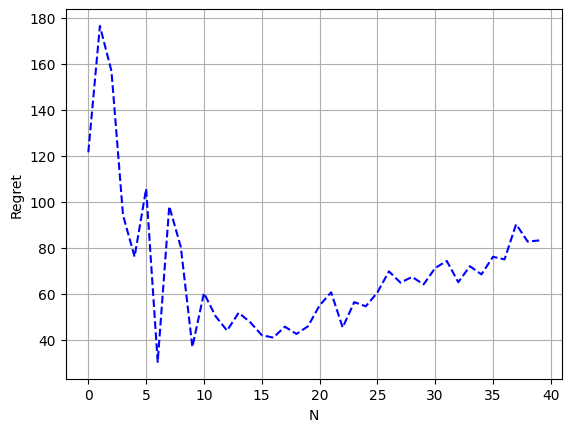

In [3]:
def explore(N, K, rews):
    Q = np.zeros(K)
    trials = np.zeros(K)
    for k in range(1, K + 1):
        rewards = rews[k - 1] + np.random.randn(N)
        Q[k - 1] = np.mean(rewards)
        trials[k - 1] = N

    return Q, trials


def exploit(Q, trials, K, N, T, rews):
    sum_reward = 0

    for t in range(K * N + 1, T + 1):
        arm = np.argmax(Q)
        reward = rews[arm] + np.random.randn()
        sum_reward += reward
        trials[arm] += 1
        Q[arm] += 1 / trials[arm] * (reward - Q[arm])

    return sum_reward


def explore_and_exploit(T, K, J, rews):
    sum_greedy = np.zeros((J, J))

    for N in range(1, J + 1):
        for j in range(1, J + 1):
            Q, trials = explore(N, K, rews)
            sum_greedy[N - 1, j - 1] = exploit(Q, trials, K, N, T, rews)

    return sum_greedy



sum_greedy = explore_and_exploit(T, K, J, rews)
bestreward = max(rews)
regretgreedy = T * bestreward - np.mean(sum_greedy, axis=1)
x = np.arange(J)
plt.plot(x, regretgreedy,'b--')
plt.xlabel('N')
plt.ylabel('Regret')
plt.grid()
plt.show()


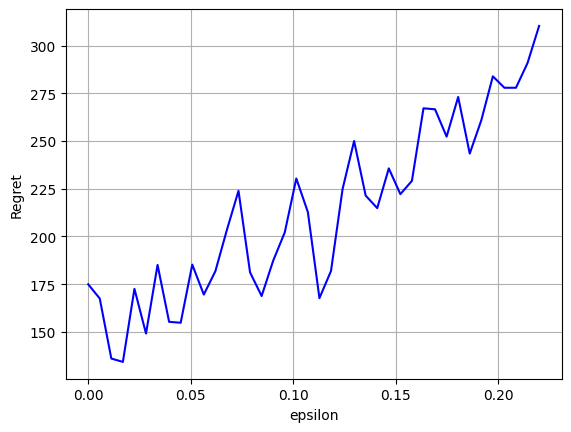

In [4]:

def explore_and_exploit(T,K,J,rews,eps, sum_epsgreedy, Q):
    for m in range(1, J + 1):
        e = eps[m - 1]

        for j in range(1, J + 1):
            rewards = rews + np.random.randn(K)
            sum_epsgreedy[m - 1, j - 1] = np.sum(rewards)
            Q = np.zeros(K)
            ntrial = np.zeros(K)

            for t in range(K + 1, T + 1):
                if np.random.rand() <= 1 - e:
                    arm = np.argmax(Q)
                else:
                    arm = np.random.randint(0, K)

                reward = rews[arm] + np.random.randn()
                sum_epsgreedy[m - 1, j - 1] += reward
                ntrial[arm] += 1
                Q[arm] += 1 / ntrial[arm] * (reward - Q[arm])

                

eps = np.linspace(0, 0.22, J)
sum_epsgreedy = np.zeros((J, J))
explore_and_exploit(T,K,J,rews,eps, sum_epsgreedy, None)

bestreward = max(rews)
regretepsgreedy = T * bestreward - np.mean(sum_epsgreedy, axis=1)
plt.plot(eps, regretepsgreedy, 'b-')
plt.xlabel('epsilon')
plt.grid()
plt.ylabel('Regret')
plt.show()


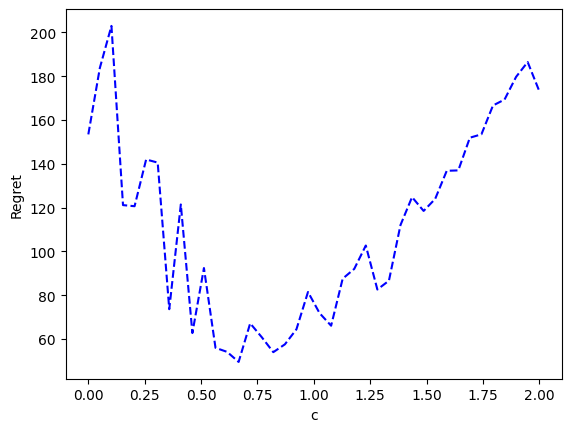

In [5]:
def UCB(c_all):
    sum_ucb = np.zeros((J, J))
    N_tried = np.zeros((J, K))

    for m in range(1, J + 1):  
        c = c_all[m - 1]
        for j in range(1, J + 1):  
            rewards = rews + np.random.randn(K)
            sum_ucb[m - 1, j - 1] = np.sum(rewards)
            Q = rewards
            N_tried[m - 1, :] = np.ones(K)

            for t in range(K + 1, T + 1):
                ucb_values = Q + c * np.sqrt(np.log(t) / N_tried[m - 1, :])
                arm = np.argmax(ucb_values)  
                reward = rews[arm] + np.random.randn() 
                sum_ucb[m - 1, j - 1] += reward  
                N_tried[m - 1, arm] += 1 
                Q[arm] += 1 / N_tried[m - 1, arm] * (reward - Q[arm]) 

    return sum_ucb


c_all = np.linspace(0, 2, J)
sumucb = UCB(c_all)
besrewards = max(rews)
regret_ucb = T * besrewards - np.mean(sumucb, axis=1)
plt.plot(c_all, regret_ucb, 'b--')
plt.xlabel('c')
plt.ylabel('Regret')
plt.show()


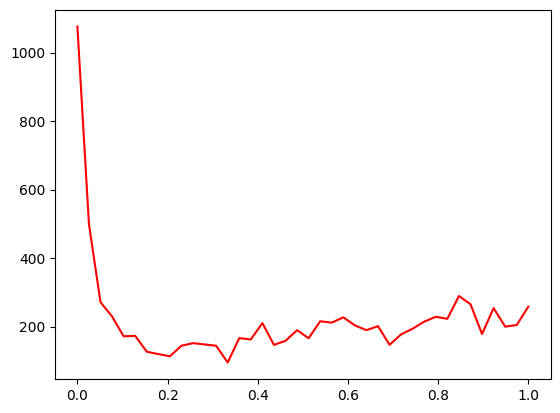

In [7]:
alpha = np.linspace(0,1,J)
sum_gb = np.zeros((J, J))
N_tried = np.zeros((J, K))

for m in range(J):
    a = alpha[m]

    for j in range(J):
        H = np.zeros(K)
        base = 0

        for t in range(1, T + 1):
            policy = np.exp(H) / np.sum(np.exp(H))
            arm = np.random.choice(K, 1, p=policy)[0]
            reward = rews[arm] + np.random.randn()

            sum_gb[m, j] += reward

            temp = np.zeros(K)
            temp[arm] = 1
            H = H + a * (reward - base) * (temp - policy)
            base = sum_gb[m, j] / t


bestmu = max(rews)
regret_gb = T*bestmu - np.mean(sum_gb,axis=1);
plt.plot(alpha, regret_gb, 'r')
plt.show()


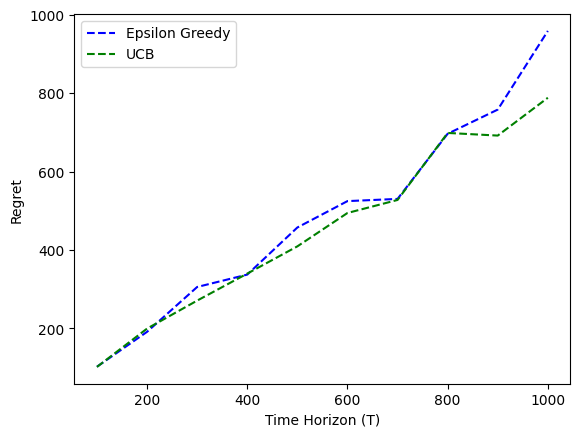

In [4]:
import numpy as np

J = 10
M=10
K = 10
mu = rews
T_all = np.arange(100, 1100, 100)
e = 0.02
c = 0.5

# Epsilon Greedy algorithm
sum_epsg = np.zeros((M, J))
for m in range(M):
    T = T_all[m]
    for j in range(J):
        rewards = mu + np.random.randn(K)
        sum_epsg[m, j] = np.sum(rewards)
        Q = rewards
        N_tried = np.ones(K)
        for t in range(K + 1, T + 1):
            if np.random.rand() <= 1 - e:
                arm = np.argmax(Q)
            else:
                arm = np.random.randint(K)
            reward = mu[arm] + np.random.randn()
            sum_epsg[m, j] += reward
            N_tried[arm] += 1
            Q[arm] += 1 / N_tried[arm] * (reward - Q[arm])

sum_ucb = np.zeros((M, J))
for m in range(M):
    T = T_all[m]
    for j in range(J):
        rewards = mu + np.random.randn(K)
        sum_ucb[m, j] = np.sum(rewards)
        Q = rewards
        N_tried = np.ones(K)
        for t in range(K + 1, T + 1):
            arm = np.argmax(Q + c * np.sqrt(np.log(t) / N_tried))
            reward = mu[arm] + np.random.randn()
            sum_ucb[m, j] += reward
            N_tried[arm] += 1
            Q[arm] += 1 / N_tried[arm] * (reward - Q[arm])


bestarm = np.argmax(mu)
regret_epsg = T_all * bestarm - np.mean(sum_epsg, axis=1)
regret_ucb = T_all * bestarm - np.mean(sum_ucb, axis=1)


plt.figure()
plt.plot(T_all, regret_epsg, 'b--', label='Epsilon Greedy')
plt.plot(T_all, regret_ucb, 'g--', label='UCB')
plt.xlabel('Time Horizon (T)')
plt.ylabel('Regret')
plt.legend()
plt.show()
